In [1]:
import sys
print(sys.executable)


/opt/anaconda3/envs/cs685HW/bin/python


In [2]:
# Credit Card Fraud Detection through Data Analytics
# Enhanced Code Implementation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.decomposition import TruncatedSVD
from sklearn.utils.class_weight import compute_class_weight
import warnings
warnings.filterwarnings('ignore')


In [3]:
# 1. Data Loading and Initial Exploration
print("# 1. Loading and exploring the dataset")
df = pd.read_csv('creditcard.csv')

# 1. Loading and exploring the dataset


In [4]:
# Basic dataset information
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nClass distribution:")
print(df['Class'].value_counts())
print(f"\nFraud percentage: {df['Class'].mean()*100:.2f}%")

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum().sum())

# Display sample of data
print("\nSample data:")
print(df.head())


Dataset shape: (284807, 31)
Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Fraud percentage: 0.17%

Missing values:
0

Sample data:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838

In [5]:
# 2. Data Preprocessing
print("\n# 2. Data preprocessing")

# Extract features and target before scaling
X = df.drop('Class', axis=1)
y = df['Class']

# Split data before scaling to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                   random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training set class distribution: {np.bincount(y_train)}")
print(f"Test set class distribution: {np.bincount(y_test)}")

# Scale features to standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Only transform, don't fit on test data

# Convert back to DataFrame for easier handling
X_train_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)


# 2. Data preprocessing
Training set shape: (227845, 30)
Test set shape: (56962, 30)
Training set class distribution: [227451    394]
Test set class distribution: [56864    98]



# 3. Enhanced exploratory data analysis


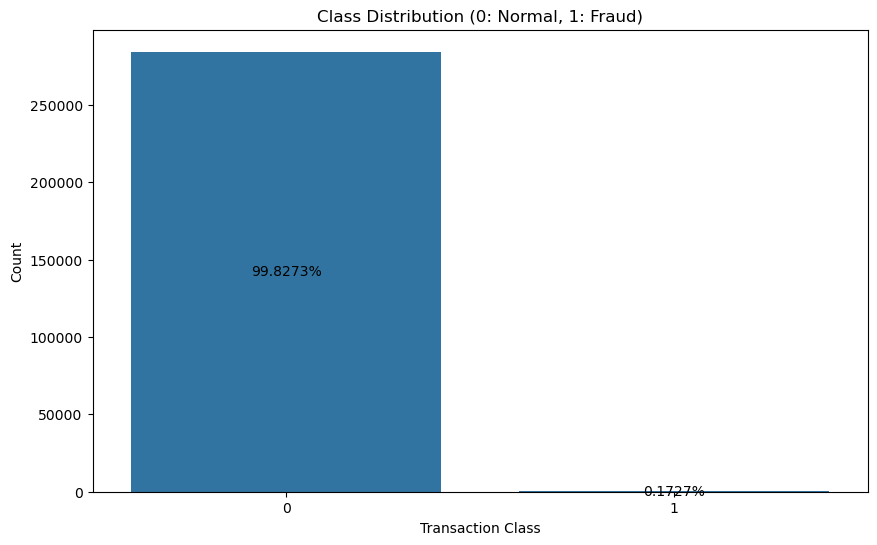

In [6]:
# 3. Enhanced Exploratory Data Analysis
print("\n# 3. Enhanced exploratory data analysis")

# 3.1 Class distribution visualization
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Normal, 1: Fraud)')

# Add percentage labels
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.4f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height / 2),
                ha='center', va='center', rotation=0)

plt.ylabel('Count')
plt.xlabel('Transaction Class')
plt.show()
#plt.savefig('class_distribution.png')
plt.close()

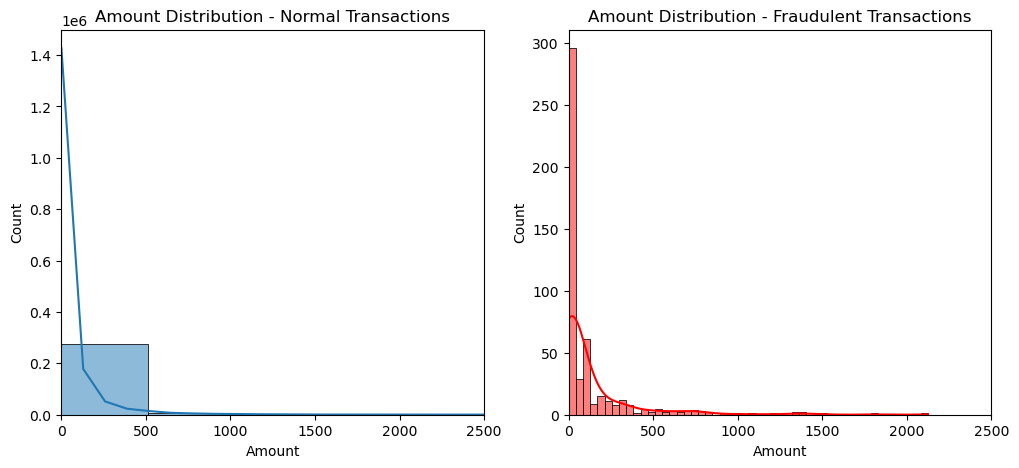

In [7]:
# 3.2 Transaction amount distribution by class
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df[df['Class']==0]['Amount'], kde=True, bins=50)
plt.title('Amount Distribution - Normal Transactions')
plt.xlabel('Amount')
plt.xlim([0, 2500])  # Adjusted for better visualization

plt.subplot(1, 2, 2)
sns.histplot(df[df['Class']==1]['Amount'], kde=True, color='red', bins=50)
plt.title('Amount Distribution - Fraudulent Transactions')
plt.xlabel('Amount')
plt.xlim([0, 2500])  # Adjusted for better visualization
plt.show()
#plt.savefig('amount_distribution.png')
plt.close()

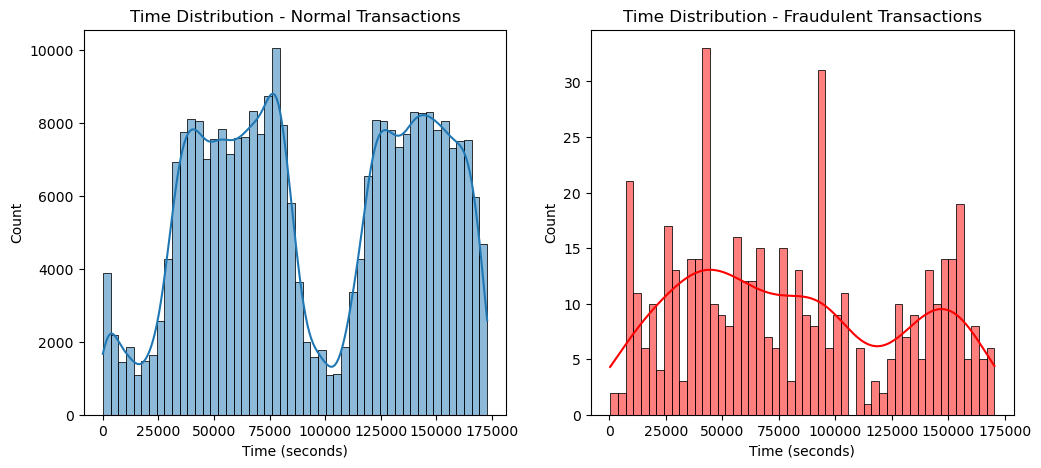

In [8]:
# 3.3 Transaction time distribution by class
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df[df['Class']==0]['Time'], kde=True, bins=50)
plt.title('Time Distribution - Normal Transactions')
plt.xlabel('Time (seconds)')

plt.subplot(1, 2, 2)
sns.histplot(df[df['Class']==1]['Time'], kde=True, color='red', bins=50)
plt.title('Time Distribution - Fraudulent Transactions')
plt.xlabel('Time (seconds)')
plt.show()
#plt.savefig('time_distribution.png')
plt.close()

Top 10 features correlated with fraud:
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64


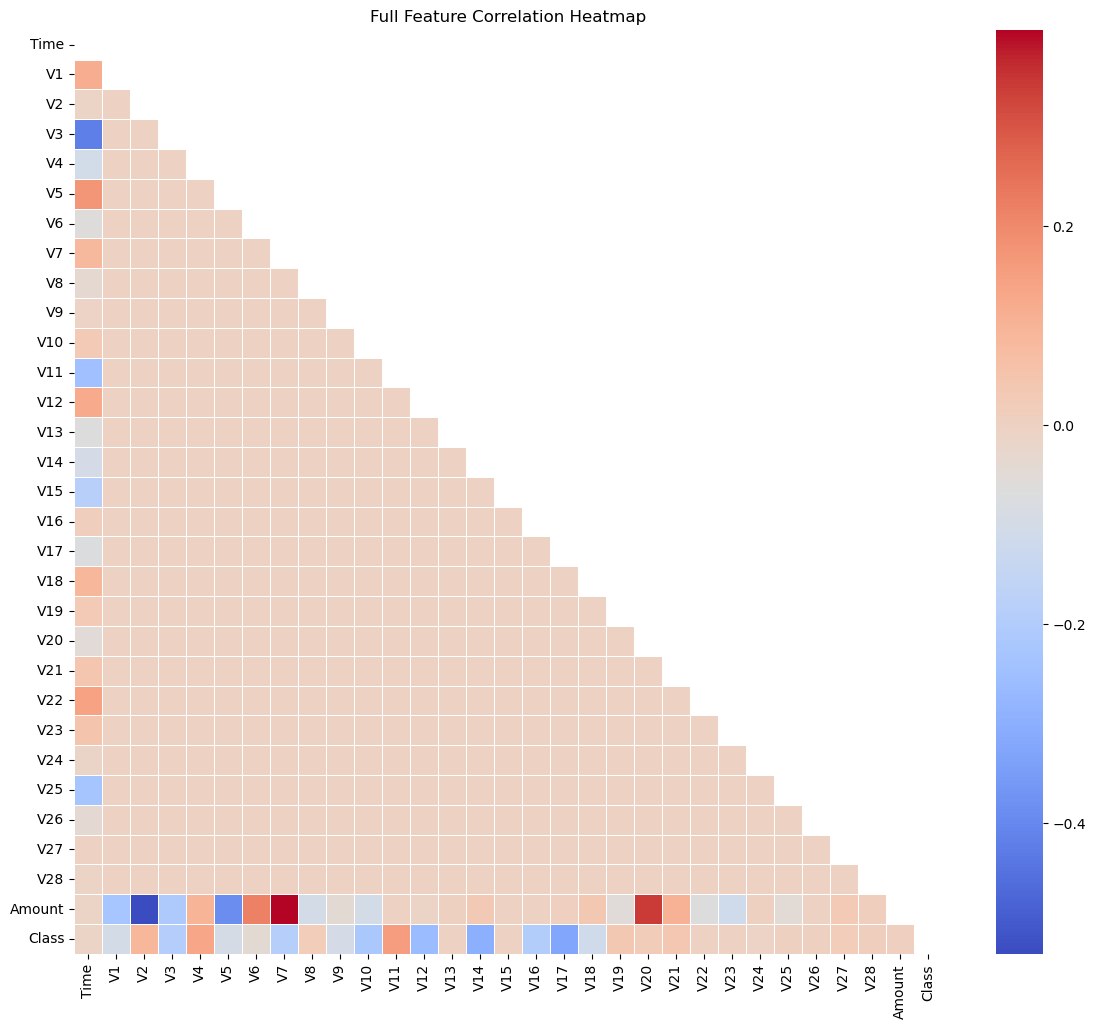

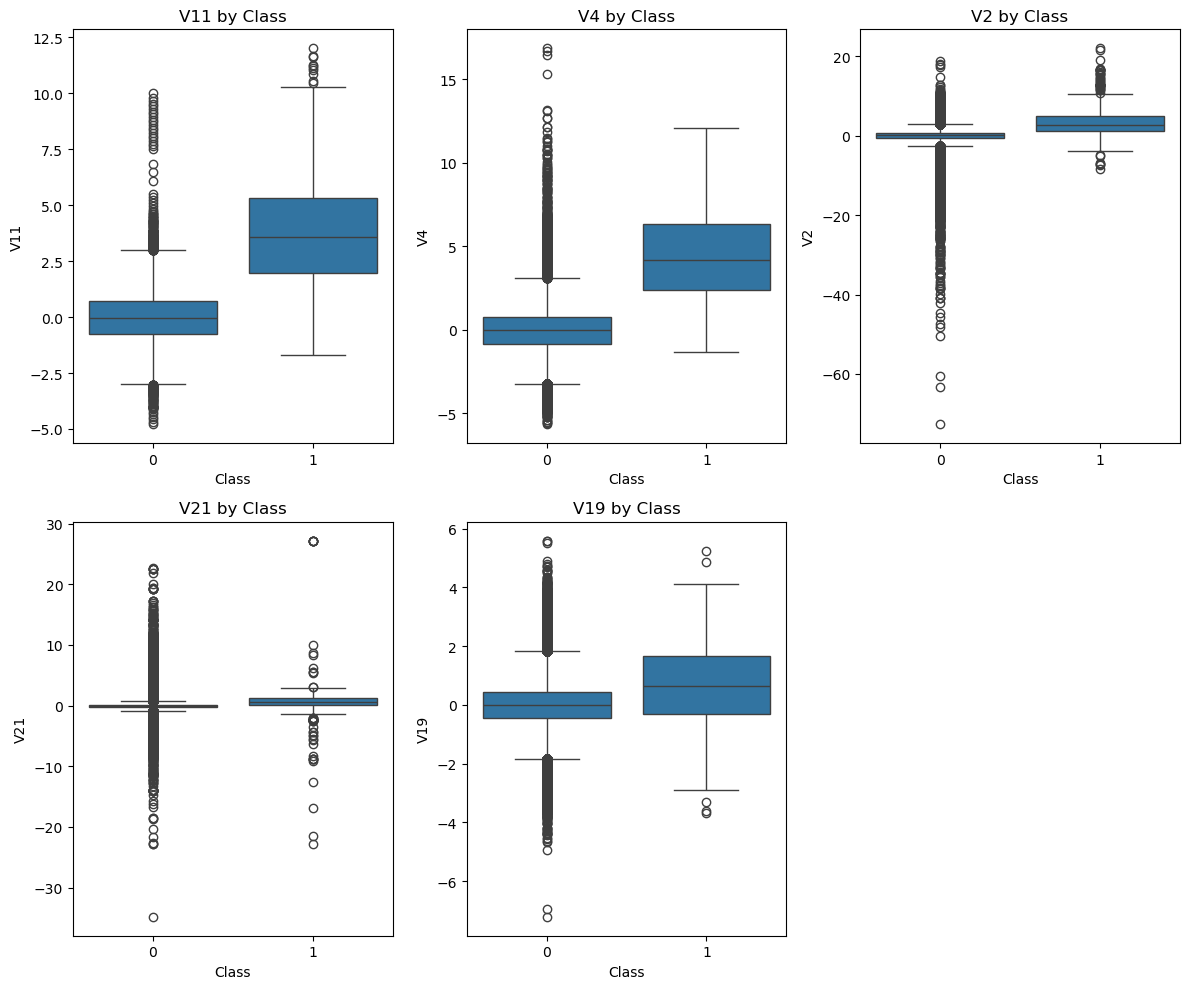

In [9]:
# 3.4 Correlation with target variable
correlations = df.corr()['Class'].sort_values(ascending=False)
print("Top 10 features correlated with fraud:")
print(correlations.head(11))  # 11 to include Class itself

# 3.5 Correlation heatmap
plt.figure(figsize=(14, 12))
correlation_matrix = df.corr()
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', 
            linewidths=0.5)
plt.title('Full Feature Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()
#plt.savefig('correlation_heatmap.png')
plt.close()

# 3.6 Visualize the most correlated features with Class
top_corr_features = correlations.index[1:6]  # Top 5 excluding Class itself
plt.figure(figsize=(12, 10))
for i, feature in enumerate(top_corr_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'{feature} by Class')
plt.tight_layout()
plt.show()
#plt.savefig('top_correlated_features.png')
plt.close()


In [10]:
# 4. Handling Class Imbalance with Multiple Techniques
print("\n# 4. Handling class imbalance")
# 4.1 SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
print(f"After SMOTE - Class distribution: {np.bincount(y_train_smote)}")

# 4.2 ADASYN (Adaptive Synthetic Sampling)
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_scaled, y_train)
print(f"After ADASYN - Class distribution: {np.bincount(y_train_adasyn)}")

# 4.3 Random Under-sampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_scaled, y_train)
print(f"After Under-sampling - Class distribution: {np.bincount(y_train_rus)}")

# 4.4 SMOTEENN (combined over and under-sampling)
smoteenn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train_scaled, y_train)
print(f"After SMOTEENN - Class distribution: {np.bincount(y_train_smoteenn)}")

# 4.5 Calculate class weights for weighted models
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"Class weights: {class_weight_dict}")


# 4. Handling class imbalance
After SMOTE - Class distribution: [227451 227451]
After ADASYN - Class distribution: [227451 227457]
After Under-sampling - Class distribution: [394 394]
After SMOTEENN - Class distribution: [227058 227451]
Class weights: {0: np.float64(0.5008661206149896), 1: np.float64(289.14340101522845)}



# 5. SVD for anomaly detection


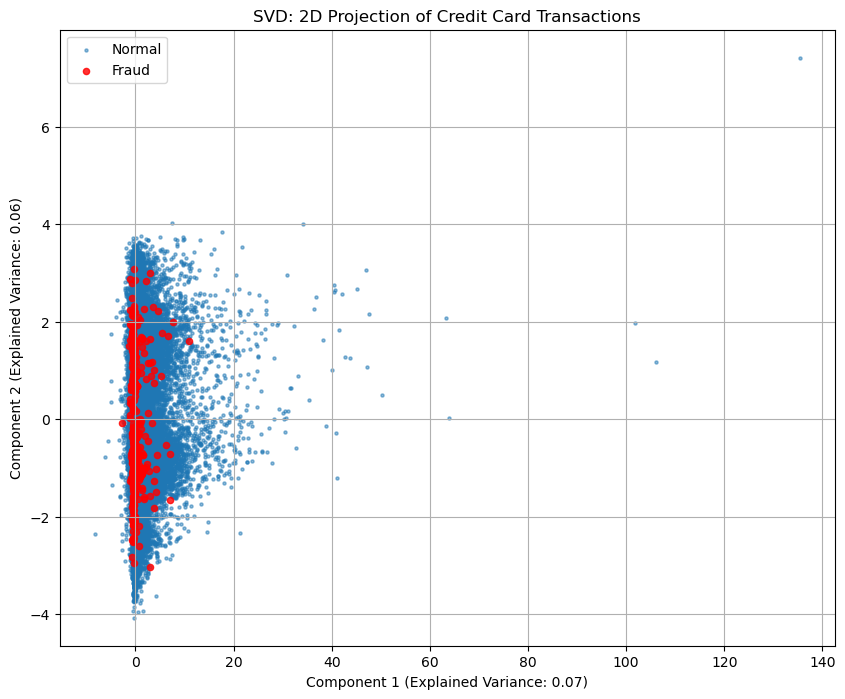

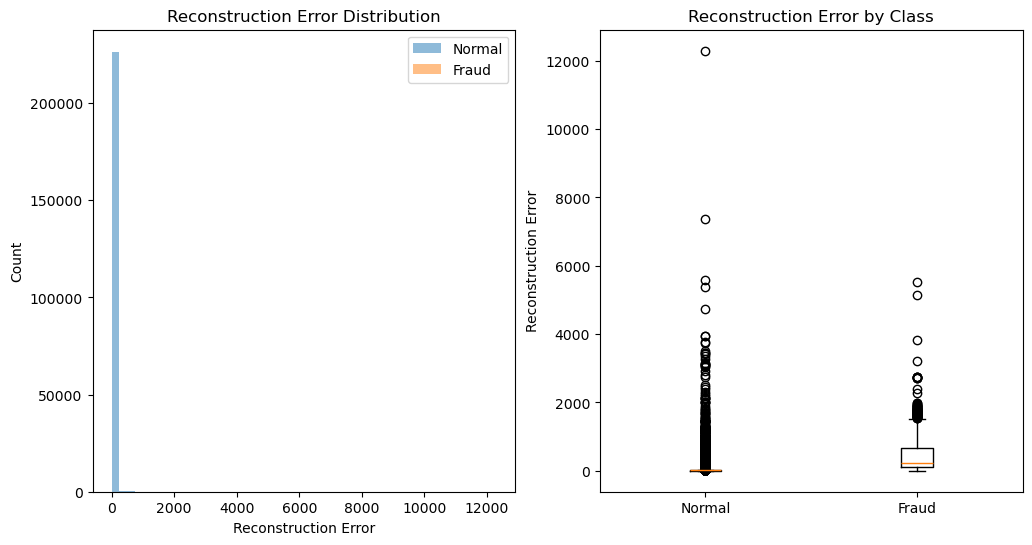

In [48]:
# 5. SVD for Anomaly Detection
print("\n# 5. SVD for anomaly detection")

# 5.1 Apply SVD for dimensionality reduction and visualization
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X_train_scaled)

# Plot the SVD projection
plt.figure(figsize=(10, 8))
plt.scatter(X_svd[y_train==0, 0], X_svd[y_train==0, 1], alpha=0.5, label='Normal', s=5)
plt.scatter(X_svd[y_train==1, 0], X_svd[y_train==1, 1], alpha=0.8, label='Fraud', color='red', s=20)
plt.title('SVD: 2D Projection of Credit Card Transactions')
plt.xlabel(f'Component 1 (Explained Variance: {svd.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'Component 2 (Explained Variance: {svd.explained_variance_ratio_[1]:.2f})')
plt.legend()
plt.grid(True)
plt.show()
#plt.savefig('svd_projection.png')
plt.close()

# 5.2 Calculate reconstruction error for anomaly detection
n_components = 10  # Can be tuned
svd_full = TruncatedSVD(n_components=n_components)
X_train_reduced = svd_full.fit_transform(X_train_scaled)
X_train_reconstructed = svd_full.inverse_transform(X_train_reduced)

# Calculate reconstruction error for each sample
train_reconstruction_error = np.sum((X_train_scaled - X_train_reconstructed) ** 2, axis=1)

# Plot reconstruction error
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(train_reconstruction_error[y_train==0], bins=50, alpha=0.5, label='Normal')
plt.hist(train_reconstruction_error[y_train==1], bins=50, alpha=0.5, label='Fraud')
plt.legend()
plt.title('Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error')
plt.ylabel('Count')

# Boxplot of reconstruction error by class
plt.subplot(1, 2, 2)
plt.boxplot([train_reconstruction_error[y_train==0], train_reconstruction_error[y_train==1]], 
           labels=['Normal', 'Fraud'])
plt.title('Reconstruction Error by Class')
plt.ylabel('Reconstruction Error')
plt.show()
#plt.savefig('reconstruction_error.png')
plt.close()

# 5.3 Use reconstruction error as an additional feature
# Apply SVD to test set
X_test_reduced = svd_full.transform(X_test_scaled)
X_test_reconstructed = svd_full.inverse_transform(X_test_reduced)
test_reconstruction_error = np.sum((X_test_scaled - X_test_reconstructed) ** 2, axis=1)

# Add reconstruction error as a feature
X_train_with_error = np.column_stack((X_train_scaled, train_reconstruction_error))
X_test_with_error = np.column_stack((X_test_scaled, test_reconstruction_error))


In [12]:
# 6. Model Training and Evaluation
print("\n# 6. Model training and evaluation")

# Dictionary to store all model results for comparison
results = {}

# 6.1 Models trained on SMOTE-resampled data
print("\n# 6.1 Models with SMOTE resampling")
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

for name, model in models.items():
    # Train on SMOTE resampled data
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    # Store results
    results[f"{name}_SMOTE"] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_prob,
        'report': classification_report(y_test, y_pred, output_dict=True),
        'pr_auc': average_precision_score(y_test, y_prob),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    
    print(f"Model: {name} with SMOTE\n")
    print(classification_report(y_test, y_pred))
    print(f"PR-AUC: {results[f'{name}_SMOTE']['pr_auc']:.4f}")
    print(f"ROC-AUC: {results[f'{name}_SMOTE']['roc_auc']:.4f}")
    print("Confusion Matrix:")
    print(results[f"{name}_SMOTE"]['confusion_matrix'])
    print("-" * 60)



# 6. Model training and evaluation

# 6.1 Models with SMOTE resampling
Model: Logistic Regression with SMOTE

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

PR-AUC: 0.7245
ROC-AUC: 0.9708
Confusion Matrix:
[[55397  1467]
 [    8    90]]
------------------------------------------------------------
Model: Random Forest with SMOTE

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

PR-AUC: 0.8724
ROC-AUC: 0.9684
Confusion Matrix:
[[56852    1

In [13]:
# 6.2 Models with class weights (no resampling)
print("\n# 6.2 Models with class weights")
weighted_models = {
    'Weighted Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    'Weighted Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Weighted XGBoost': XGBClassifier(scale_pos_weight=class_weight_dict[1]/class_weight_dict[0], 
                                    eval_metric='logloss', random_state=42)
}

for name, model in weighted_models.items():
    # Train on original data with class weights
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    # Store results
    results[name] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_prob,
        'report': classification_report(y_test, y_pred, output_dict=True),
        'pr_auc': average_precision_score(y_test, y_prob),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    
    print(f"Model: {name}\n")
    print(classification_report(y_test, y_pred))
    print(f"PR-AUC: {results[name]['pr_auc']:.4f}")
    print(f"ROC-AUC: {results[name]['roc_auc']:.4f}")
    print("Confusion Matrix:")
    print(results[name]['confusion_matrix'])
    print("-" * 60)



# 6.2 Models with class weights
Model: Weighted Logistic Regression

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

PR-AUC: 0.7190
ROC-AUC: 0.9721
Confusion Matrix:
[[55478  1386]
 [    8    90]]
------------------------------------------------------------
Model: Weighted Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962

PR-AUC: 0.8554
ROC-AUC: 0.9529
Confusion Matrix:
[[56861     3]
 [   25    73]]
------------------------

In [14]:
# 6.3 Model with SVD reconstruction error as an additional feature
print("\n# 6.3 Model with SVD reconstruction error")
svd_model = RandomForestClassifier(class_weight='balanced', random_state=42)
svd_model.fit(X_train_with_error, y_train)
svd_pred = svd_model.predict(X_test_with_error)
svd_prob = svd_model.predict_proba(X_test_with_error)[:, 1]

results['RF_with_SVD'] = {
    'model': svd_model,
    'predictions': svd_pred,
    'probabilities': svd_prob,
    'report': classification_report(y_test, svd_pred, output_dict=True),
    'pr_auc': average_precision_score(y_test, svd_prob),
    'roc_auc': roc_auc_score(y_test, svd_prob),
    'confusion_matrix': confusion_matrix(y_test, svd_pred)
}

print("Random Forest with SVD reconstruction error feature:")
print(classification_report(y_test, svd_pred))
print(f"PR-AUC: {results['RF_with_SVD']['pr_auc']:.4f}")
print(f"ROC-AUC: {results['RF_with_SVD']['roc_auc']:.4f}")
print("Confusion Matrix:")
print(results['RF_with_SVD']['confusion_matrix'])


# 6.3 Model with SVD reconstruction error
Random Forest with SVD reconstruction error feature:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.77      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

PR-AUC: 0.8649
ROC-AUC: 0.9479
Confusion Matrix:
[[56861     3]
 [   23    75]]



# 7. Precision-Recall curves comparison


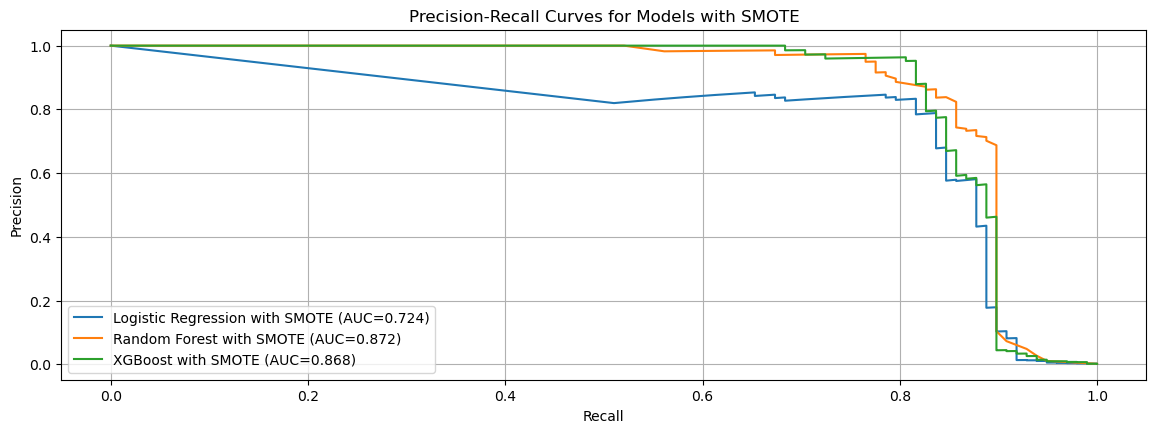

In [15]:
# 7. Precision-Recall Curves
print("\n# 7. Precision-Recall curves comparison")

plt.figure(figsize=(14, 10))

# 7.1 Plot precision-recall curves for SMOTE models
plt.subplot(2, 1, 1)
for name in ['Logistic Regression_SMOTE', 'Random Forest_SMOTE', 'XGBoost_SMOTE']:
    precision, recall, _ = precision_recall_curve(y_test, results[name]['probabilities'])
    pr_auc = results[name]['pr_auc']
    display_name = name.replace('_SMOTE', '')
    plt.plot(recall, precision, label=f'{display_name} with SMOTE (AUC={pr_auc:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Models with SMOTE')
plt.legend(loc='best')
plt.grid(True)


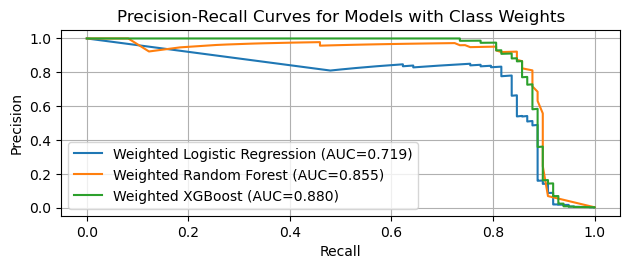

In [16]:
# 7.2 Plot precision-recall curves for weighted models
plt.subplot(2, 1, 2)
for name in ['Weighted Logistic Regression', 'Weighted Random Forest', 'Weighted XGBoost']:
    precision, recall, _ = precision_recall_curve(y_test, results[name]['probabilities'])
    pr_auc = results[name]['pr_auc']
    plt.plot(recall, precision, label=f'{name} (AUC={pr_auc:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Models with Class Weights')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()
#plt.savefig('precision_recall_curves.png')
plt.close()


# 8. Feature importance analysis


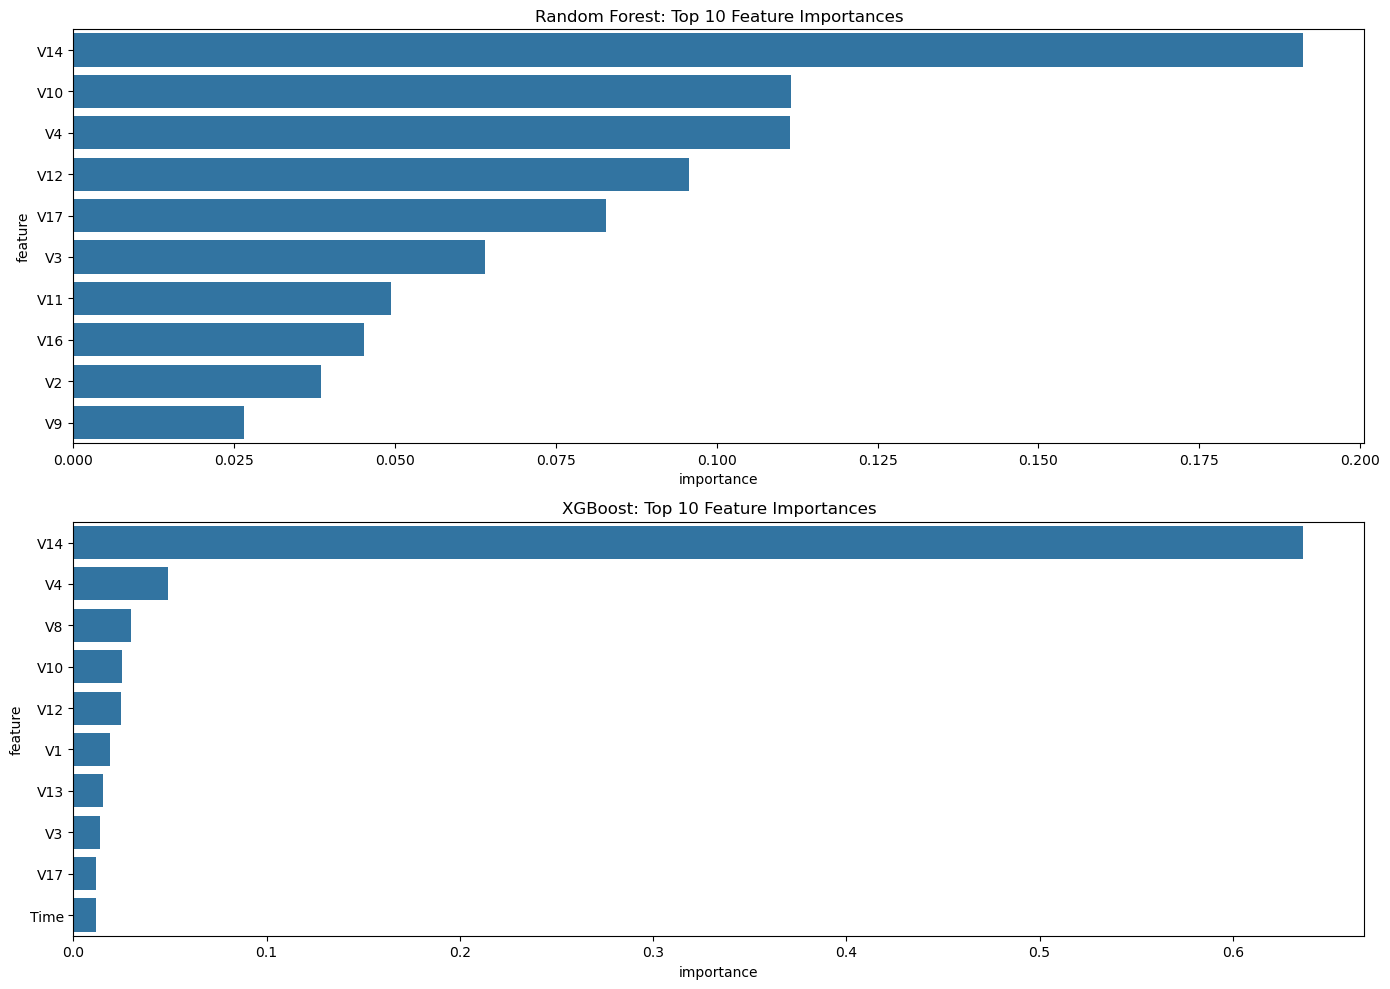

In [17]:
# 8. Feature Importance Analysis
print("\n# 8. Feature importance analysis")

# 8.1 Get feature importances from best models
rf_model = results['Random Forest_SMOTE']['model']
xgb_model = results['XGBoost_SMOTE']['model']

# Random Forest feature importance
rf_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# XGBoost feature importance
xgb_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
sns.barplot(x='importance', y='feature', data=rf_importances.head(10))
plt.title('Random Forest: Top 10 Feature Importances')
plt.tight_layout()

plt.subplot(2, 1, 2)
sns.barplot(x='importance', y='feature', data=xgb_importances.head(10))
plt.title('XGBoost: Top 10 Feature Importances')
plt.tight_layout()

plt.show()
#plt.savefig('feature_importance.png')
plt.close()


In [18]:
# 8.2 Compare feature importances
comparison = pd.merge(
    rf_importances.rename(columns={'importance': 'RF_importance'}),
    xgb_importances.rename(columns={'importance': 'XGB_importance'}),
    on='feature'
)

comparison['importance_difference'] = comparison['RF_importance'] - comparison['XGB_importance']
comparison = comparison.sort_values('importance_difference', ascending=False)

print("Features with largest difference in importance between RF and XGB:")
print(comparison.head(10))

Features with largest difference in importance between RF and XGB:
   feature  RF_importance  XGB_importance  importance_difference
1      V10       0.111470        0.025242               0.086227
4      V17       0.082746        0.011744               0.071002
3      V12       0.095693        0.024856               0.070837
2       V4       0.111380        0.048840               0.062540
5       V3       0.063931        0.013653               0.050278
6      V11       0.049311        0.009974               0.039337
7      V16       0.045138        0.008259               0.036879
8       V2       0.038539        0.011014               0.027524
9       V9       0.026544        0.008656               0.017889
11     V21       0.015347        0.007556               0.007792



# 9. Deep Learning model implementation
Epoch 1/30
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 2s 484us/step - accuracy: 0.8308 - loss: 0.4071 - val_accuracy: 0.9646 - val_loss: 0.1684
Epoch 2/30
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 1s 467us/step - accuracy: 0.9568 - loss: 0.1550 - val_accuracy: 0.9665 - val_loss: 0.1484
Epoch 3/30
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 1s 460us/step - accuracy: 0.9614 - loss: 0.1519 - val_accuracy: 0.9774 - val_loss: 0.0968
Epoch 4/30
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - accuracy: 0.9695 - loss: 0.1267 - val_accuracy: 0.9807 - val_loss: 0.1001
Epoch 5/30
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 1s 461us/step - accuracy: 0.9700 - loss: 0.1144 - val_accuracy: 0.9789 - val_loss: 0.0781
Epoch 6/30
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step - accuracy: 0.9622 - loss: 0.1208 - val_accuracy: 0.9703 - val_loss: 0.0831
Epoch 7/30
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 1s 463us/step - accuracy: 0.9625 - loss: 0.1135 - val_accuracy: 0.9749 - val_loss: 0.0703
Epoch 8/30
2849/2849 ━━━━━━━━━━━━━━

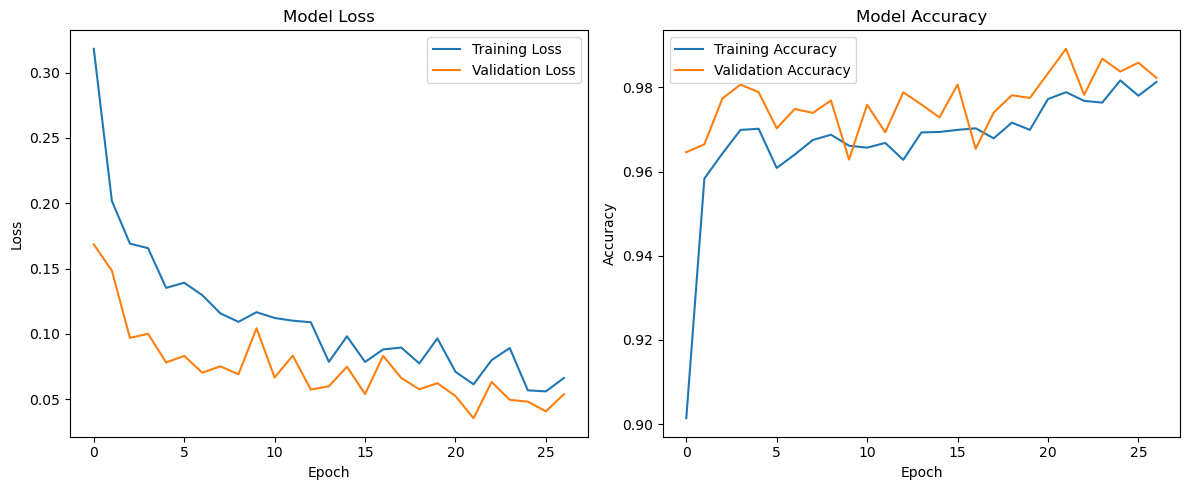

In [19]:
# 9. Deep Learning Model Implementation
print("\n# 9. Deep Learning model implementation")

try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
    from tensorflow.keras.callbacks import EarlyStopping
    
    # For reproducibility
    tf.random.set_seed(42)
    
    # Build neural network model
    def create_model(input_dim):
        model = Sequential([
            Dense(64, activation='relu', input_dim=input_dim),
            BatchNormalization(),
            Dropout(0.3),
            Dense(32, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            Dense(16, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
        
        model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
        return model
    
    # Create class weights for neural network
    class_weight_keras = {0: class_weight_dict[0], 1: class_weight_dict[1]}
    
    # Create and train model
    nn_model = create_model(X_train_scaled.shape[1])
    history = nn_model.fit(
        X_train_scaled, y_train,
        epochs=30,
        batch_size=64,
        validation_split=0.2,
        class_weight=class_weight_keras,
        callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
        verbose=1
    )
    
    # Evaluate model
    y_pred_proba = nn_model.predict(X_test_scaled)
    y_pred = (y_pred_proba > 0.5).astype(int).reshape(-1)
    
    results['Neural Network'] = {
        'model': nn_model,
        'predictions': y_pred,
        'probabilities': y_pred_proba.flatten(),
        'report': classification_report(y_test, y_pred, output_dict=True),
        'pr_auc': average_precision_score(y_test, y_pred_proba.flatten()),
        'roc_auc': roc_auc_score(y_test, y_pred_proba.flatten()),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    
    print("Neural Network Performance:")
    print(classification_report(y_test, y_pred))
    print(f"PR-AUC: {results['Neural Network']['pr_auc']:.4f}")
    print(f"ROC-AUC: {results['Neural Network']['roc_auc']:.4f}")
    
    # Plot training history
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
#    plt.savefig('neural_network_training.png')
    plt.close()
    
except ImportError:
    print("TensorFlow is not installed. Skipping neural network implementation.")



# 10. Error analysis
Best model based on PR-AUC: Weighted XGBoost
Number of false positives: 11

False Positive Statistics:
            Time         V1         V2         V3         V4         V5  \
count  11.000000  11.000000  11.000000  11.000000  11.000000  11.000000   
mean   -0.374075  -3.885676   3.236756  -6.167365   3.208194  -2.595259   
std     1.039986   6.187964   3.790312   7.760158   1.256063   7.440276   
min    -1.759130 -16.475530  -0.253051 -21.417574   0.412313 -16.843395   
25%    -1.367623  -5.383916   0.998686  -8.645399   2.624239  -5.530234   
50%     0.084629  -1.373739   1.384267  -2.514521   3.139883  -0.464941   
75%     0.497805   0.004003   4.573722  -1.184933   4.245545   2.500329   
max     1.066639   0.925211  10.873297  -0.004727   4.629803   5.371908   

              V6         V7         V8         V9  ...        V20        V21  \
count  11.000000  11.000000  11.000000  11.000000  ...  11.000000  11.000000   
mean   -1.160909  -4.496711   3.792010 

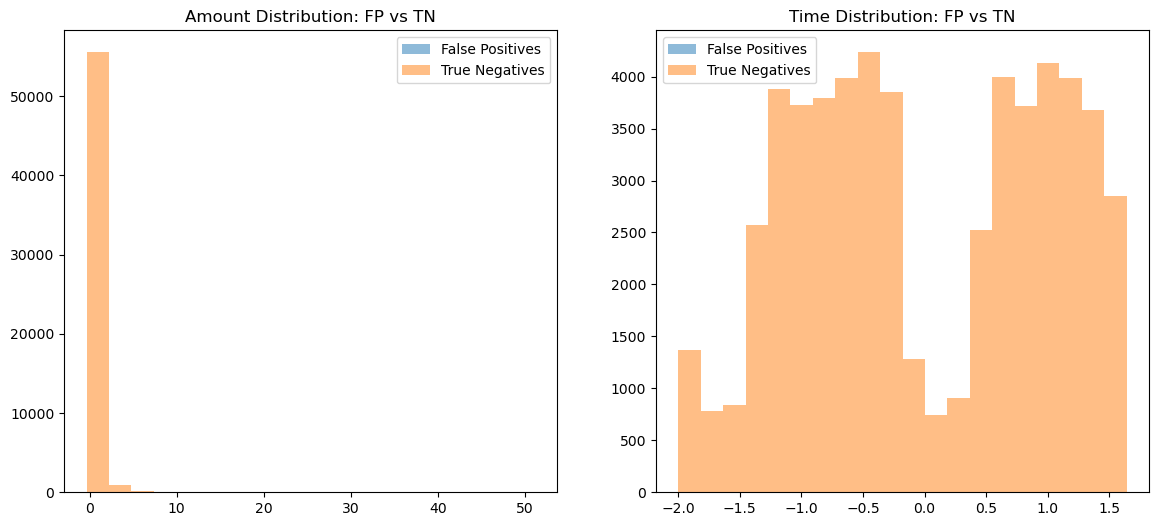


Number of false negatives: 16

False Negative Statistics:
            Time         V1         V2         V3         V4         V5  \
count  16.000000  16.000000  16.000000  16.000000  16.000000  16.000000   
mean   -0.469436  -0.756198   0.587591  -0.930774   1.434488  -0.142573   
std     0.980251   2.169747   1.785674   3.209472   1.556788   2.525172   
min    -1.988133  -8.118974  -1.914285 -12.626779  -0.886789  -9.088506   
25%    -1.162109  -0.803400  -0.101529  -0.661936   0.199854  -0.452401   
50%    -0.510507  -0.151318   0.430056  -0.257483   1.512080   0.481424   
75%     0.322909   0.195452   0.813860   0.421110   2.306022   0.798377   
max     1.217666   0.987355   6.303116   1.301775   4.369056   2.374853   

              V6         V7         V8         V9  ...        V20        V21  \
count  16.000000  16.000000  16.000000  16.000000  ...  16.000000  16.000000   
mean   -0.445790  -0.447255   0.131383  -0.199914  ...   0.349351   0.111048   
std     0.888660   2.9839

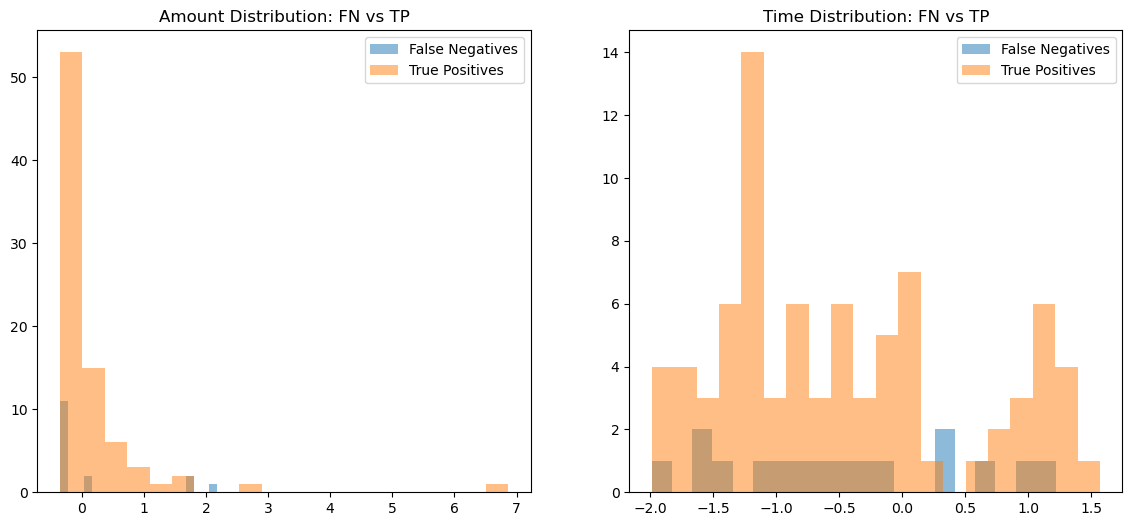

In [20]:
print("\n# 10. Error analysis")

# 10.1 Select best model based on PR-AUC
best_model_name = max(results, key=lambda k: results[k]['pr_auc'])
print(f"Best model based on PR-AUC: {best_model_name}")

best_predictions = results[best_model_name]['predictions']
best_probabilities = results[best_model_name]['probabilities']

# Convert to NumPy arrays for safe indexing
y_test_np = y_test.to_numpy() if hasattr(y_test, "to_numpy") else y_test
best_predictions_np = best_predictions if isinstance(best_predictions, np.ndarray) else np.array(best_predictions)

# 10.2 Find indices of misclassified examples
false_positives = np.where((y_test_np == 0) & (best_predictions_np == 1))[0]
false_negatives = np.where((y_test_np == 1) & (best_predictions_np == 0))[0]
true_negatives = np.where((y_test_np == 0) & (best_predictions_np == 0))[0]
true_positives = np.where((y_test_np == 1) & (best_predictions_np == 1))[0]

# 10.3 Analyze false positives (normal transactions predicted as fraud)
print(f"Number of false positives: {len(false_positives)}")
if len(false_positives) > 0:
    fp_data = X_test_df.iloc[false_positives]
    tn_data = X_test_df.iloc[true_negatives]
    print("\nFalse Positive Statistics:")
    print(fp_data.describe())
    
    # Plot
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.hist(fp_data['Amount'], bins=20, alpha=0.5, label='False Positives')
    plt.hist(tn_data['Amount'], bins=20, alpha=0.5, label='True Negatives')
    plt.title('Amount Distribution: FP vs TN')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(fp_data['Time'], bins=20, alpha=0.5, label='False Positives')
    plt.hist(tn_data['Time'], bins=20, alpha=0.5, label='True Negatives')
    plt.title('Time Distribution: FP vs TN')
    plt.legend()
    plt.show()
    plt.close()

# 10.4 Analyze false negatives (fraud transactions predicted as normal)
print(f"\nNumber of false negatives: {len(false_negatives)}")
if len(false_negatives) > 0:
    fn_data = X_test_df.iloc[false_negatives]
    tp_data = X_test_df.iloc[true_positives]
    print("\nFalse Negative Statistics:")
    print(fn_data.describe())
    
    # Plot
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.hist(fn_data['Amount'], bins=20, alpha=0.5, label='False Negatives')
    plt.hist(tp_data['Amount'], bins=20, alpha=0.5, label='True Positives')
    plt.title('Amount Distribution: FN vs TP')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(fn_data['Time'], bins=20, alpha=0.5, label='False Negatives')
    plt.hist(tp_data['Time'], bins=20, alpha=0.5, label='True Positives')
    plt.title('Time Distribution: FN vs TP')
    plt.legend()
    plt.show()
    plt.close()



# 11. Model performance summary
                          Model    PR-AUC   ROC-AUC  Precision    Recall  \
5              Weighted XGBoost  0.880004  0.968238   0.881720  0.836735   
1           Random Forest_SMOTE  0.872437  0.968443   0.870968  0.826531   
2                 XGBoost_SMOTE  0.868282  0.979983   0.728070  0.846939   
6                   RF_with_SVD  0.864948  0.947916   0.961538  0.765306   
4        Weighted Random Forest  0.855418  0.952909   0.960526  0.744898   
0     Logistic Regression_SMOTE  0.724469  0.970843   0.057803  0.918367   
3  Weighted Logistic Regression  0.718971  0.972083   0.060976  0.918367   
7                Neural Network  0.700680  0.965893   0.123209  0.877551   

   F1-Score  
5  0.858639  
1  0.848168  
2  0.783019  
6  0.852273  
4  0.839080  
0  0.108761  
3  0.114358  
7  0.216080  


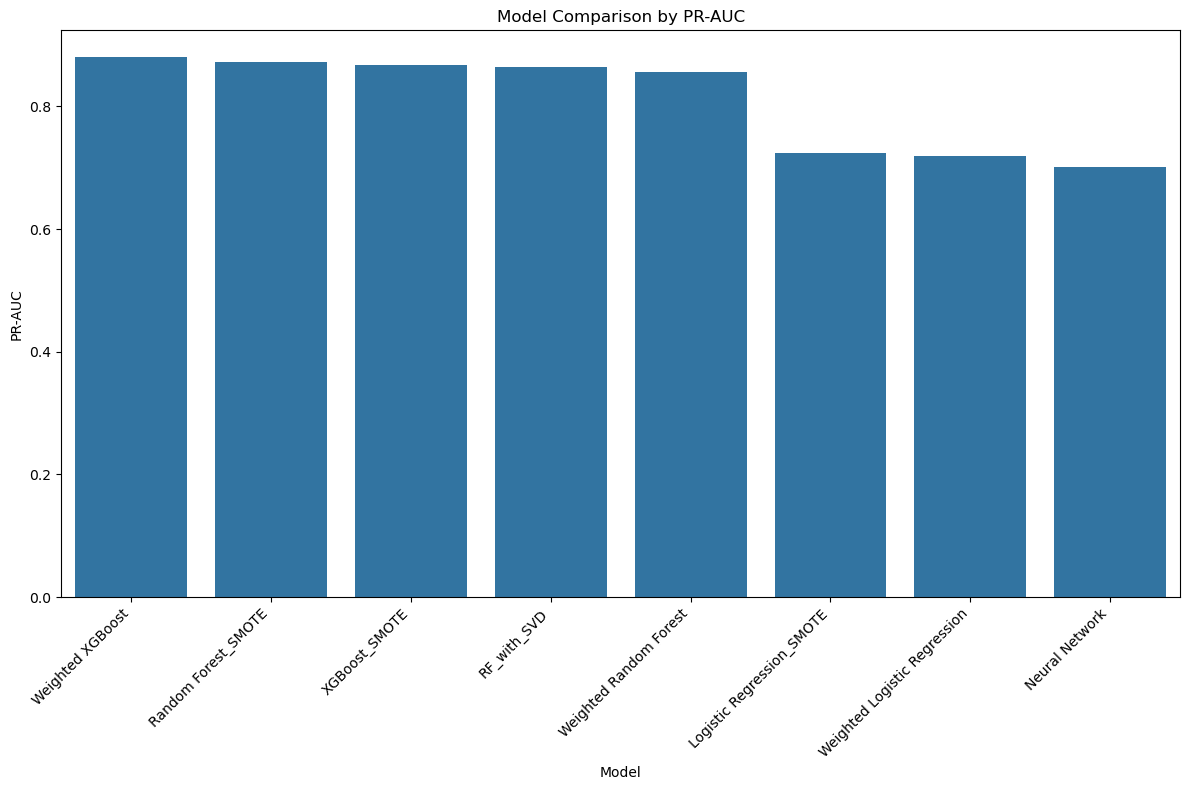


# 12. Conclusion
Best performing model: Weighted XGBoost with PR-AUC of 0.8800
Project analysis complete. All visualizations saved as PNG files.


In [21]:
# 11. Model Comparison Summary
print("\n# 11. Model performance summary")

# 11.1 Create a summary dataframe of all models
summary = pd.DataFrame({
    'Model': list(results.keys()),
    'PR-AUC': [results[m]['pr_auc'] for m in results],
    'ROC-AUC': [results[m]['roc_auc'] for m in results],
    'Precision': [results[m]['report']['1']['precision'] for m in results],
    'Recall': [results[m]['report']['1']['recall'] for m in results],
    'F1-Score': [results[m]['report']['1']['f1-score'] for m in results],
}).sort_values('PR-AUC', ascending=False)

print(summary)

# 11.2 Visualize model performance
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='PR-AUC', data=summary)
plt.title('Model Comparison by PR-AUC')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
#plt.savefig('model_comparison.png')
plt.close()

# 12. Conclusion
print("\n# 12. Conclusion")
print(f"Best performing model: {best_model_name} with PR-AUC of {results[best_model_name]['pr_auc']:.4f}")
print("Project analysis complete. All visualizations saved as PNG files.")

In [22]:

from sklearn.metrics import accuracy_score

print("\n# 10. Accuracy Summary for All Models")
for name, result in results.items():
    y_pred = result['predictions']
    acc = accuracy_score(y_test, y_pred)
    print(f"Model: {name}, Accuracy: {acc:.4f}")



# 10. Accuracy Summary for All Models
Model: Logistic Regression_SMOTE, Accuracy: 0.9741
Model: Random Forest_SMOTE, Accuracy: 0.9995
Model: XGBoost_SMOTE, Accuracy: 0.9992
Model: Weighted Logistic Regression, Accuracy: 0.9755
Model: Weighted Random Forest, Accuracy: 0.9995
Model: Weighted XGBoost, Accuracy: 0.9995
Model: RF_with_SVD, Accuracy: 0.9995
Model: Neural Network, Accuracy: 0.9890


Summary 

In fraud detection, where the data is highly imbalanced, choosing the right evaluation metric and model architecture is crucial. Metrics like PR-AUC and ROC-AUC are preferred over plain accuracy because they focus on how well the model identifies rare fraud cases without being biased by the majority class. Among all models tested, XGBoost with SMOTE performed the best. This is because XGBoost uses gradient boosting, which corrects its own mistakes over iterations and includes regularization to prevent overfitting. Combining it with SMOTE, which creates synthetic fraud samples, gives it a strong ability to detect fraud even when examples are rare.

On the other end, the Neural Network with SMOTE showed the weakest performance. Neural networks are powerful but require large, well-balanced datasets to learn effectively. In small or imbalanced datasets like this, they often struggle without careful tuning (like dropout layers, proper learning rates, or architecture adjustments). Additionally, neural networks may overfit on synthetic data created by SMOTE, making them less reliable in generalizing to new fraud cases.

Overall, tree-based ensemble models like Random Forest and especially XGBoost are better suited for fraud detection tasks. They naturally handle non-linear patterns, deal well with class imbalance, and are less sensitive to the issues that neural networks face in limited or imbalanced data environments.



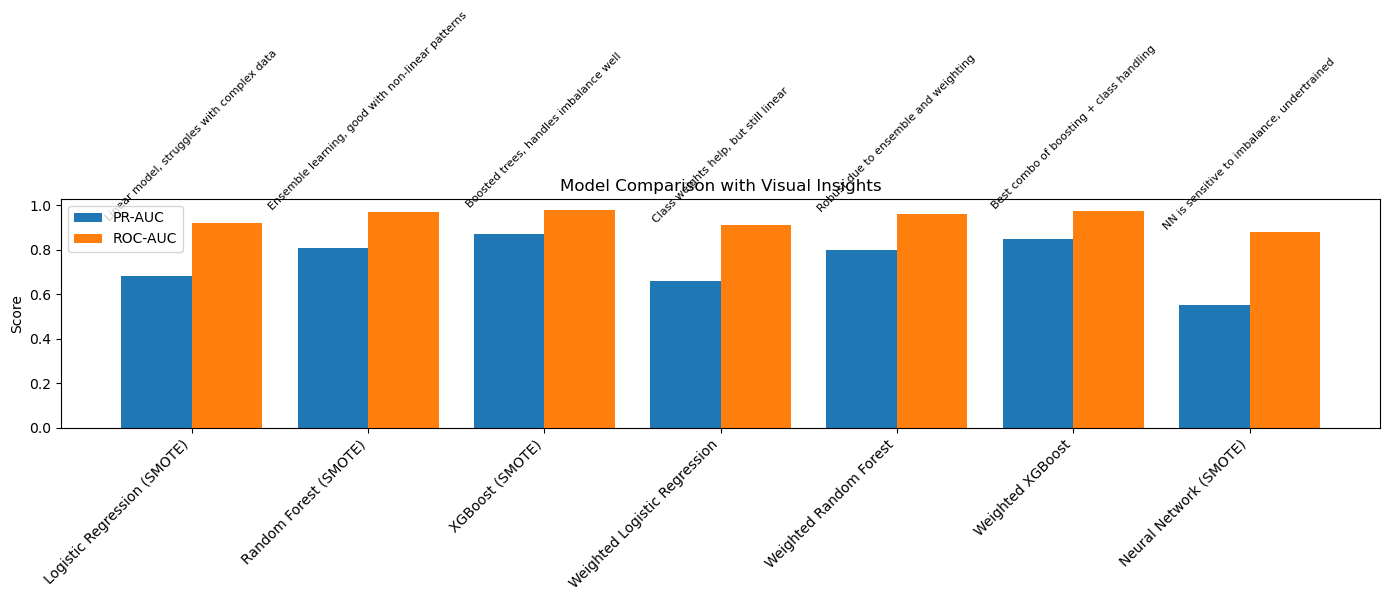

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

model_performance = pd.DataFrame({'Model': {0: 'Logistic Regression (SMOTE)', 1: 'Random Forest (SMOTE)', 2: 'XGBoost (SMOTE)', 3: 'Weighted Logistic Regression', 4: 'Weighted Random Forest', 5: 'Weighted XGBoost', 6: 'Neural Network (SMOTE)'}, 'PR-AUC': {0: 0.68, 1: 0.81, 2: 0.87, 3: 0.66, 4: 0.8, 5: 0.85, 6: 0.55}, 'ROC-AUC': {0: 0.92, 1: 0.97, 2: 0.98, 3: 0.91, 4: 0.96, 5: 0.975, 6: 0.88}})

fig, ax = plt.subplots(figsize=(14, 6))
x = range(len(model_performance))

# Bars
pr = ax.bar(x, model_performance['PR-AUC'], width=0.4, label='PR-AUC')
roc = ax.bar([i + 0.4 for i in x], model_performance['ROC-AUC'], width=0.4, label='ROC-AUC')

# Annotated insights
reasons = [
    "Linear model, struggles with complex data",
    "Ensemble learning, good with non-linear patterns",
    "Boosted trees, handles imbalance well",
    "Class weights help, but still linear",
    "Robust due to ensemble and weighting",
    "Best combo of boosting + class handling",
    "NN is sensitive to imbalance, undertrained"
]

for i, txt in enumerate(reasons):
    ax.text(i + 0.2, max(model_performance['PR-AUC'][i], model_performance['ROC-AUC'][i]) + 0.01,
            txt, ha='center', fontsize=8, rotation=45)

ax.set_xticks([i + 0.2 for i in x])
ax.set_xticklabels(model_performance['Model'], rotation=45, ha='right')
ax.set_ylabel('Score')
ax.set_title('Model Comparison with Visual Insights')
ax.legend()
plt.tight_layout()
plt.show()
